This notebook shows an example of creating average power profiles from a table of accumulated energy data.
We select a single circuit of accumulated energy data from our large table, convert it to power, and then calculate statistics over each hour. 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('aggregated_PV_data.csv', parse_dates=True, index_col=0)
data.head()

,111,112,113,114,121,122,123,124,131,132,...,203,204,221,222,223,224,231,232,233,234
DT,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2016-01-01 00:15:00,0.003,0.005,0.004,0.004,0.004,0.003,0.008,0.0,0.008,0.008,...,0.0,0.0,0.003,0.004,0.0,0.0,0.004,0.008,0.006,0.0
2016-01-01 00:30:00,0.006,0.010,0.007,0.008,0.009,0.005,0.016,0.0,0.016,0.015,...,0.0,0.0,0.006,0.007,0.0,0.0,0.007,0.016,0.009,0.0
2016-01-01 00:45:00,0.009,0.015,0.007,0.012,0.014,0.007,0.022,0.0,0.024,0.023,...,0.0,0.0,0.010,0.011,0.0,0.0,0.010,0.024,0.012,0.0
2016-01-01 01:00:00,0.011,0.020,0.007,0.016,0.019,0.007,0.029,0.0,0.032,0.030,...,0.0,0.0,0.013,0.015,0.0,0.0,0.013,0.032,0.015,0.0


The energy data is reported as cumulative kilowatt-hours.
The power is 
$$ \Delta E / \Delta t $$

$\Delta E$ is in units of kWh.
If we express $\Delta t$ in units of hours, the power will be in units of kW.
Multiplying by 1000 W per kW will give us the power in watts.

In the following cell, we calculate the energy differences and convert to units of watts.
We then create a table (DataFrame) of the power and the hour that it is observed.
This allows us to calculate statistics on the power by the hour of the data.

In [2]:
delta_t_hours = 0.25
w_per_kw = 1000
single_series = data['111'].diff(1) / delta_t_hours * w_per_kw
ssdf = pd.DataFrame({'power':single_series})
ssdf['hour'] = ssdf.index.hour
ssdf.head()

,power,hour
DT,,
2016-01-01 00:00:00,NaN,0
2016-01-01 00:15:00,12.0,0
2016-01-01 00:30:00,12.0,0
2016-01-01 00:45:00,12.0,0
2016-01-01 01:00:00,8.0,1


From this table of power and the hour, we can use the `groupby` function to make a table of descriptive statistics.
From this table, it is straightforward to create the plots below.

In [3]:
profile = pd.DataFrame()
profile['mean'] = ssdf.groupby(['hour']).mean()
profile['median'] = ssdf.groupby(['hour']).median()
profile['max'] = ssdf.groupby(['hour']).max()
profile['min'] = ssdf.groupby(['hour']).min()
profile.head()

,mean,median,max,min
0,10.622723,12.0,512.0,0.0
1,9.128292,12.0,104.0,0.0
2,8.842640,8.0,112.0,0.0
3,8.097152,8.0,88.0,0.0
4,4.153584,0.0,72.0,0.0


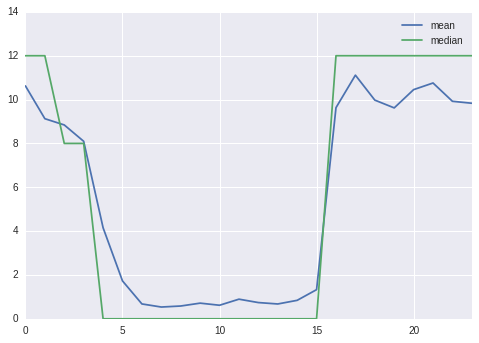

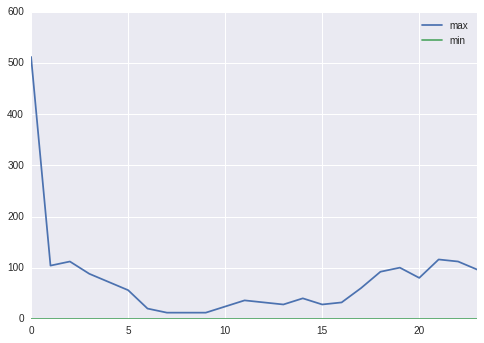

In [4]:
profile[['mean', 'median']].plot()
profile[['max', 'min']].plot()